# Basic Information of xenium_mouse_brain data Used for Cell Segmentation

In [ ]:
import tifffile
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [ ]:
# read basics
with tiff.TiffFile("../xenium_mouse_brain/morphology_focus/morphology_focus_0000.ome.tif") as tif:
    metadata_xml = tif.ome_metadata

# Parse the XML
root = ET.fromstring(metadata_xml)
ns = {'ome': 'http://www.openmicroscopy.org/Schemas/OME/2016-06'}

# Assume there's one image in the file
image = root.find('ome:Image', ns)
pixels = image.find('ome:Pixels', ns)

# Extract and print useful metadata
print("🔍 OME-TIFF Metadata Summary")
print("=" * 35)
print(f"Image Name      : {image.attrib.get('Name')}")
print(f"Pixel Type      : {pixels.attrib.get('Type')}")
print(f"Size (X × Y)    : {pixels.attrib.get('SizeX')} × {pixels.attrib.get('SizeY')}")
print(f"SizeZ × SizeC × SizeT : {pixels.attrib.get('SizeZ')} × {pixels.attrib.get('SizeC')} × {pixels.attrib.get('SizeT')}")
print(f"Physical Size X : {pixels.attrib.get('PhysicalSizeX')} {pixels.attrib.get('PhysicalSizeXUnit')}")
print(f"Physical Size Y : {pixels.attrib.get('PhysicalSizeY')} {pixels.attrib.get('PhysicalSizeYUnit')}")
print(f"Number of Channels: {len(pixels.findall('ome:Channel', ns))}")
print("=" * 35)

🔍 OME-TIFF Metadata Summary
Image Name      : None
Pixel Type      : uint16
Size (X × Y)    : 34154 × 23912
SizeZ × SizeC × SizeT : 1 × 4 × 1
Physical Size X : 0.2125 µm
Physical Size Y : 0.2125 µm
Number of Channels: 4


dapi: (23912, 34154)
boundary: (23912, 34154)


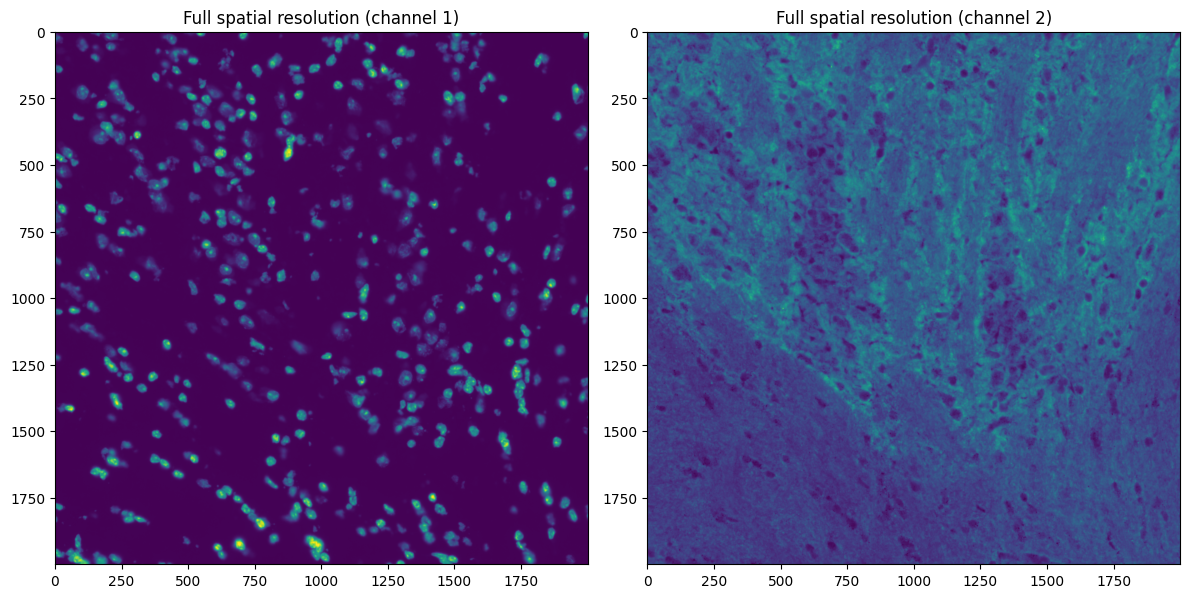

In [15]:
# Load one of the multi-file OME-TIFF files as a regular TIFF file at full resolution.
fullres_img_dapi = tifffile.imread(
    "../xenium_mouse_brain/morphology_focus/morphology_focus_0000.ome.tif", is_ome=False, level=0)

# Load another of the multi-file OME-TIFF files as a regular TIFF file at full resolution.
fullres_img_boundary = tifffile.imread(
    "../xenium_mouse_brain/morphology_focus/morphology_focus_0001.ome.tif", is_ome=False, level=0)
# Examine shape of array (number of channels, height, width)

print("dapi:", fullres_img_dapi.shape)
print("boundary:", fullres_img_boundary.shape)

# Define crop coordinates in full-res
y1, y2 = 10000, 12000
x1, x2 = 15000, 17000

# Plot both using mapped coordinates
fig, axes = plt.subplots(ncols=2, nrows=1, squeeze=False, figsize=(12, 6))
axes[0, 0].imshow(fullres_img_dapi[y1:y2, x1:x2], cmap="viridis")
axes[0, 0].set_title(f"Full spatial resolution (channel 1)")

axes[0, 1].imshow(fullres_img_boundary[y1:y2, x1:x2], cmap="viridis")
axes[0, 1].set_title(f"Full spatial resolution (channel 2)")

plt.tight_layout()

Full: (23912, 34154)
Half: (11956, 17077)


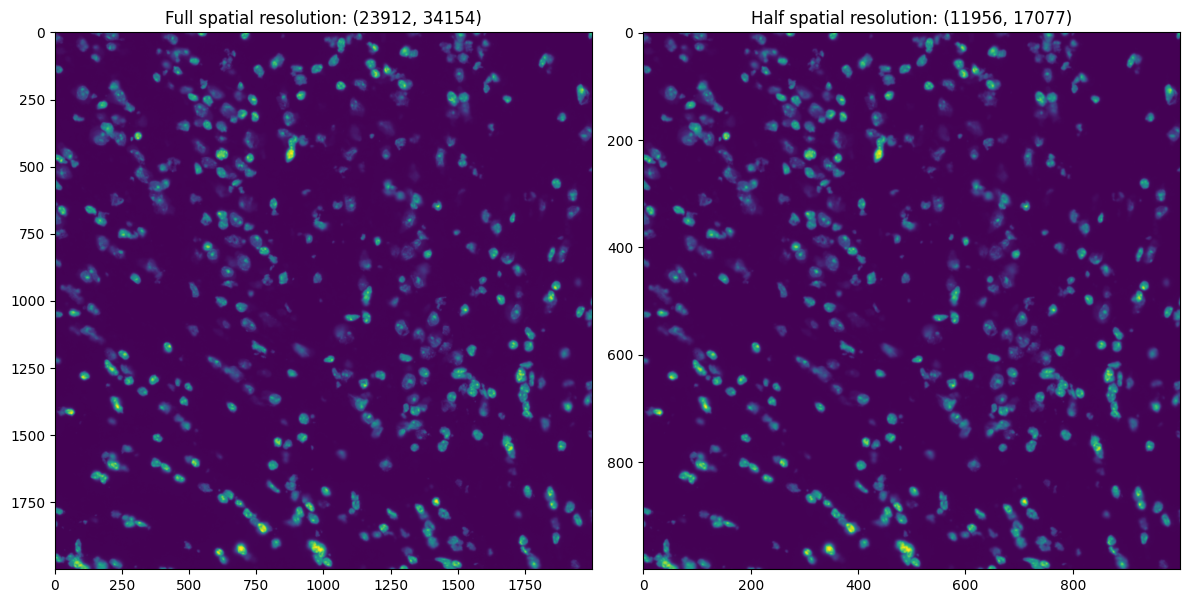

In [16]:
# Load one of the multi-file OME-TIFF files as a regular TIFF file at full resolution.
fullres_img_dapi = tifffile.imread(
    "../xenium_mouse_brain/morphology_focus/morphology_focus_0000.ome.tif", is_ome=False, level=0)

# Now load the file at downsampled resolution
halfres_img_dapi = tifffile.imread(
    "../xenium_mouse_brain/morphology_focus/morphology_focus_0000.ome.tif", is_ome=False, level=1)
# Examine shape of array (number of channels, height, width)

print("Full:", fullres_img_dapi.shape)
print("Half:", halfres_img_dapi.shape)

# Define crop coordinates in full-res
y1, y2 = 10000, 12000
x1, x2 = 15000, 17000

# Plot both using mapped coordinates
fig, axes = plt.subplots(ncols=2, nrows=1, squeeze=False, figsize=(12, 6))
axes[0, 0].imshow(fullres_img_dapi[y1:y2, x1:x2], cmap="viridis")
axes[0, 0].set_title(f"Full spatial resolution: {fullres_img_dapi.shape}")

# Calculate corresponding region in downsampled image
scale_factor = fullres_img_dapi.shape[0] / halfres_img_dapi.shape[0]  # usually 2.0
y1_ds, y2_ds = int(y1 / scale_factor), int(y2 / scale_factor)
x1_ds, x2_ds = int(x1 / scale_factor), int(x2 / scale_factor)

axes[0, 1].imshow(halfres_img_dapi[y1_ds:y2_ds, x1_ds:x2_ds], cmap="viridis")
axes[0, 1].set_title(f"Half spatial resolution: {halfres_img_dapi.shape}")

plt.tight_layout()